## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing data

In [2]:
real_data=pd.read_excel("Data_Train.xlsx",engine = 'openpyxl')
data=real_data.copy()

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Data Pre-processing

In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Treating Missing Values

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(10682, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Extracting Date and Month

In [12]:
def change_to_datetime(df,col):
    df[col]=pd.to_datetime(df[col])

In [13]:
for col in ['Date_of_Journey','Dep_Time', 'Arrival_Time',]:
    change_to_datetime(data,col)

In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

In [16]:
data.drop('Date_of_Journey',axis=1,inplace=True)

### Extracting Hour and Minutes

In [17]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_minute(df,col):
    df[col+'_minute']=df[col].dt.minute

In [18]:
extract_hour(data,'Dep_Time')
extract_minute(data,'Dep_Time')
data.drop('Dep_Time',axis=1,inplace=True)

extract_hour(data,'Arrival_Time')
extract_minute(data,'Arrival_Time')
data.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
new_duration=data['Duration'].values
for row in range(len(new_duration)):
    r=new_duration[row].split(' ')
    if len(r)!=2:
        if r[0].endswith('h'):
            new_duration[row]=r[0]+' 0m'
        else:
            new_duration[row]='0h '+r[0]
data['Duration']=new_duration

In [20]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
def split_hour(elm):
    return elm.split(' ')[0][:-1]

def split_minute(elm):
    return elm.split(' ')[1][:-1]

In [22]:
data['Duration_hours']=data['Duration'].apply(split_hour)
data['Duration_minutes']=data['Duration'].apply(split_minute)

In [23]:
data.drop('Duration',axis=1,inplace=True)

In [24]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minutes       object
dtype: object

In [25]:
data['Duration_hours']=data['Duration_hours'].astype('int64')
data['Duration_minutes']=data['Duration_minutes'].astype('int64')

In [26]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_minutes        int64
dtype: object

### Separating Categorical features

In [27]:
cat_col=[col for col in data.columns if data[col].dtype=='O']
cont_col=[col for col in data.columns if data[col].dtype!='O']

In [28]:
print(cat_col)
print(cont_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
['Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes']


In [29]:
cat_df=data[cat_col]
cont_df=data[cont_col]

In [30]:
cont_df['Total_Stops']=cat_df['Total_Stops']
cat_df.drop('Total_Stops',axis=1,inplace=True)

In [31]:
cat_df.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


### Handling categorical features

In [32]:
cat_df.drop('Additional_Info',axis=1,inplace=True)

In [33]:
cat_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
len(cat_df['Airline'].unique())

12

In [35]:
cat_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
cat_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
cat_df['City_1']=cat_df['Route'].str.split('→').str[0]
cat_df['City_2']=cat_df['Route'].str.split('→').str[1]
cat_df['City_3']=cat_df['Route'].str.split('→').str[2]
cat_df['City_4']=cat_df['Route'].str.split('→').str[3]
cat_df['City_5']=cat_df['Route'].str.split('→').str[4]
cat_df['City_6']=cat_df['Route'].str.split('→').str[5]

In [38]:
cat_df.drop('Route',axis=1,inplace=True)

In [39]:
cat_df.isnull().sum()

Airline            0
Source             0
Destination        0
City_1             0
City_2             0
City_3          3491
City_4          9116
City_5         10636
City_6         10681
dtype: int64

In [40]:
# majority of the data in these columns is NaN(null).
#dropping stop1 cuz it is the source itself
cat_df.drop(['City_1','City_5','City_6'],axis=1,inplace=True)

In [41]:
for r in ['City_2','City_3','City_4']:
    cat_df[r].fillna('None',inplace=True)

In [42]:
cont_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
cont_df['Total_Stops']=cont_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

## Plots

### Categorical Features

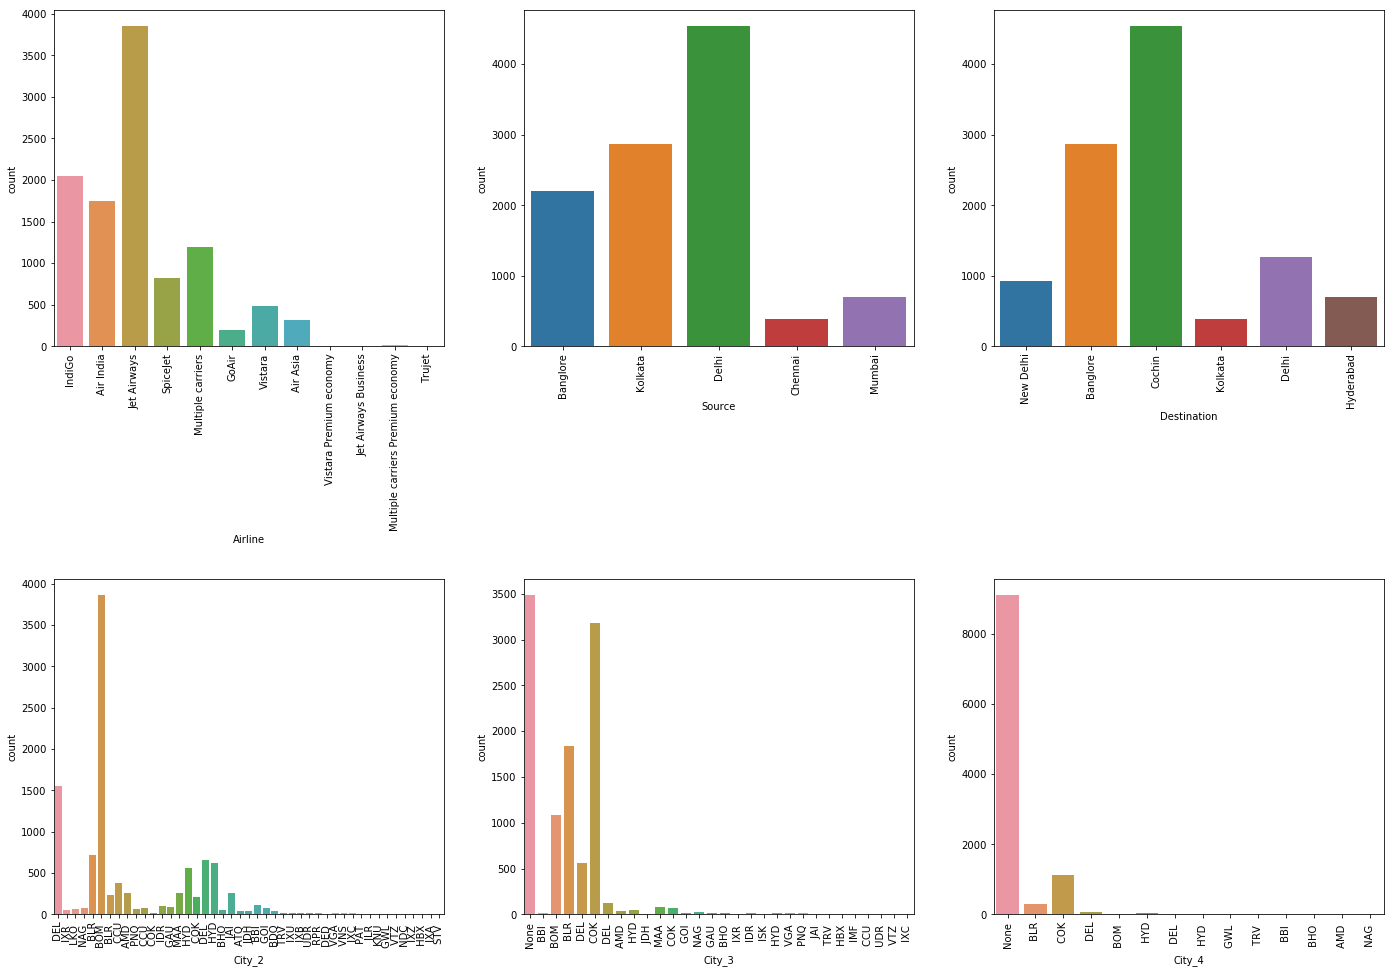

In [44]:
c=1
plt.figure(figsize=(20,45))

for i in cat_df.columns:
    plt.subplot(6,3,c)
    sns.countplot(cat_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

### Numerical Features

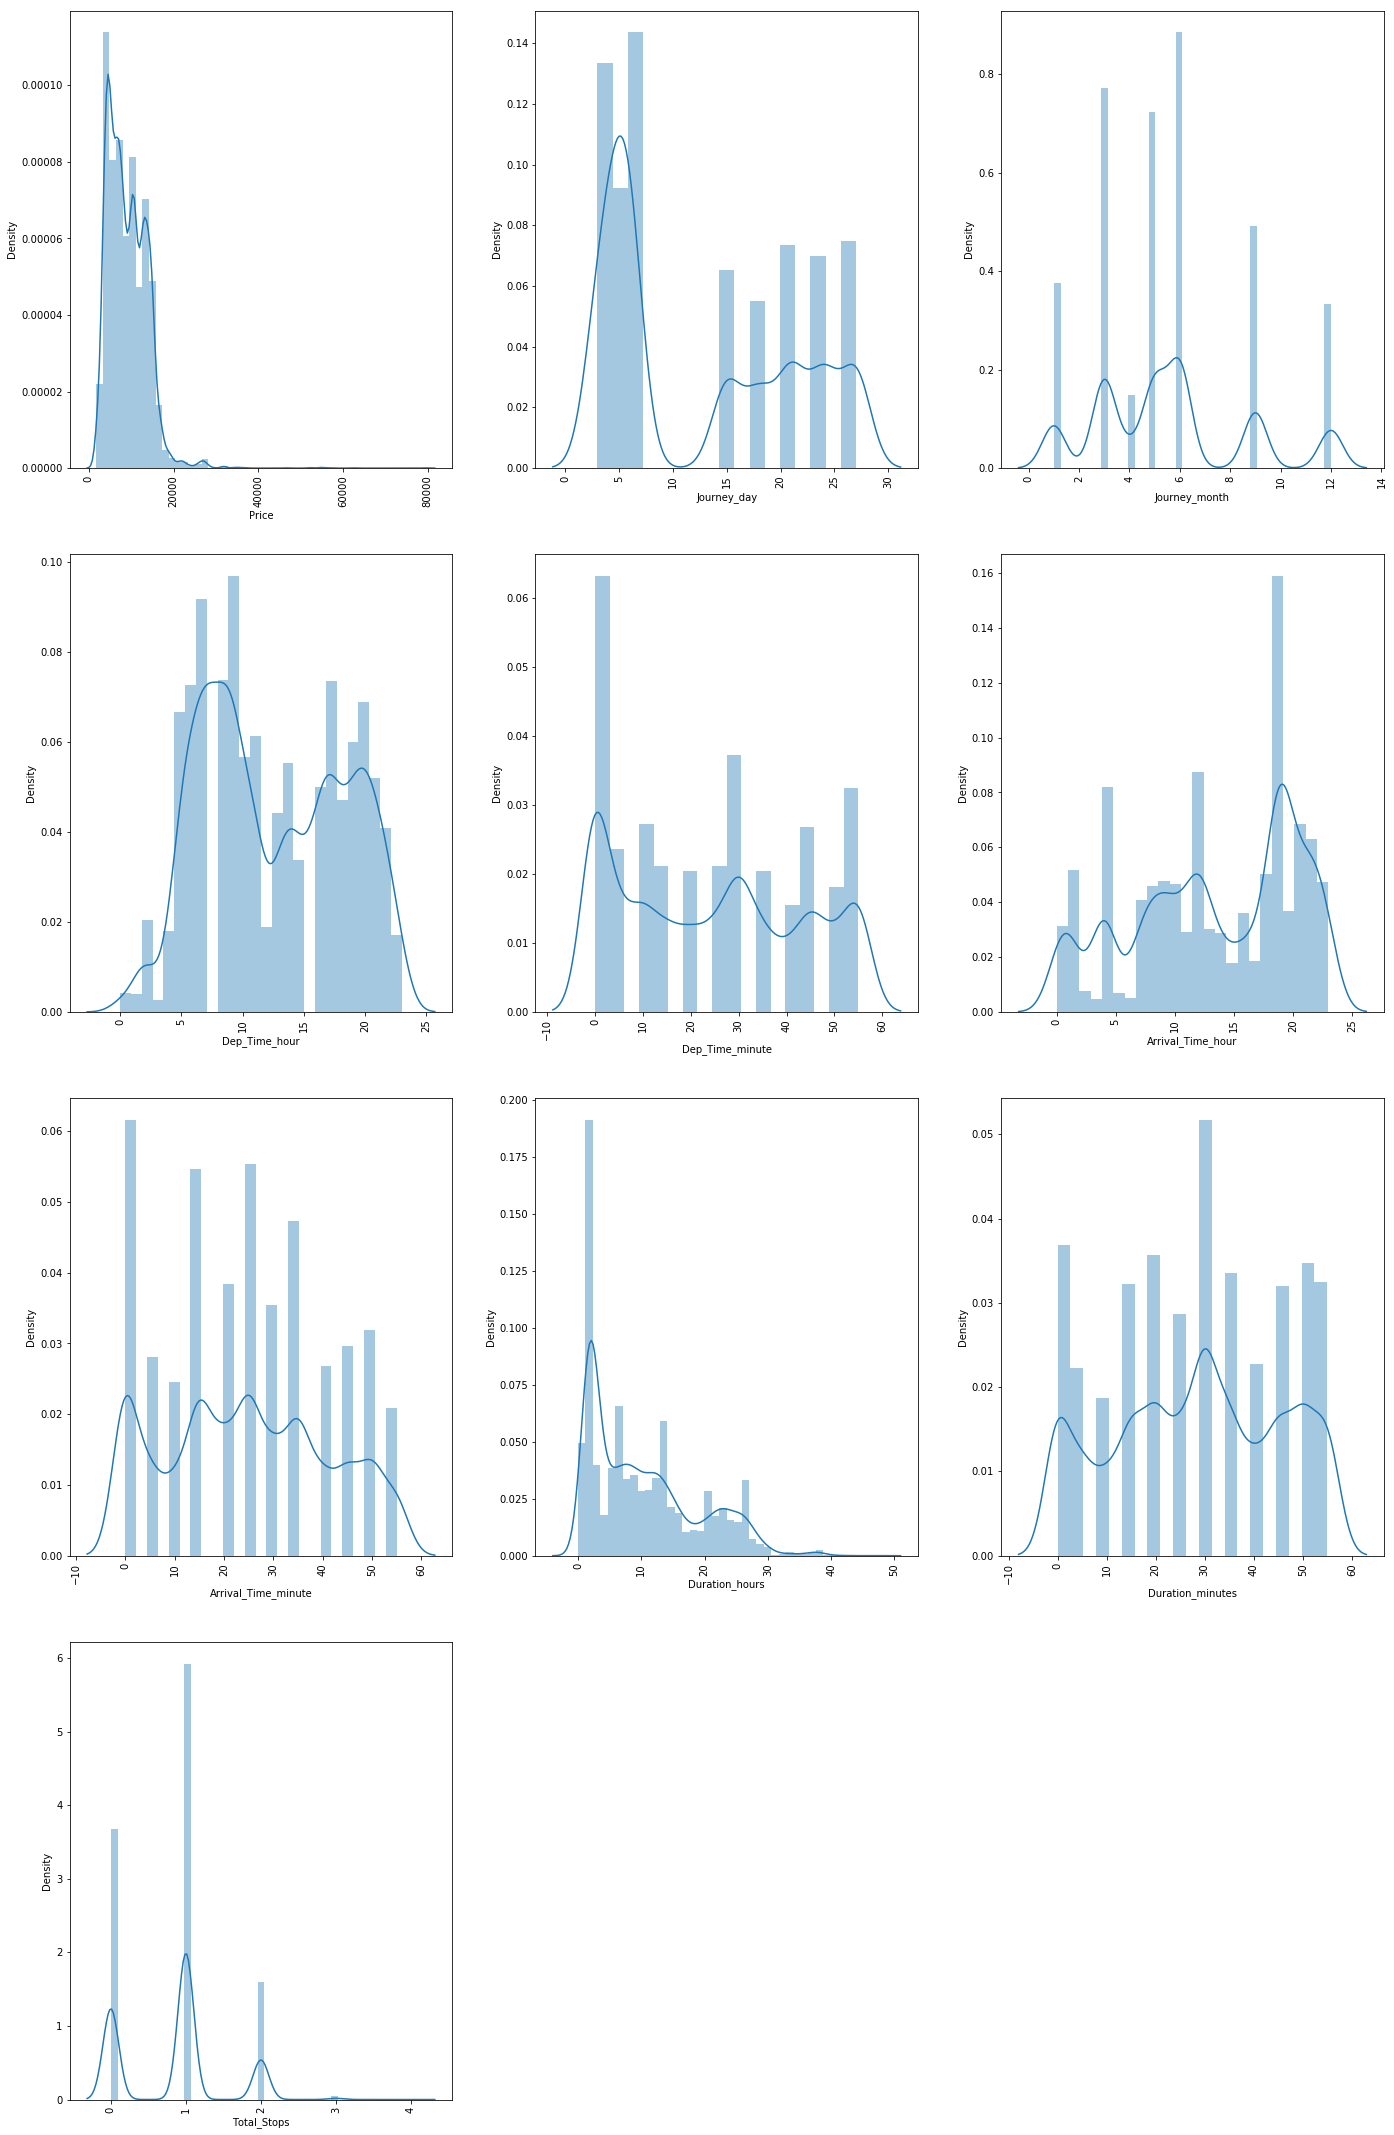

In [45]:
c=1
plt.figure(figsize=(20,45))

for i in cont_df.columns:
    plt.subplot(6,3,c)
    sns.distplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

### Categorical features Vs price

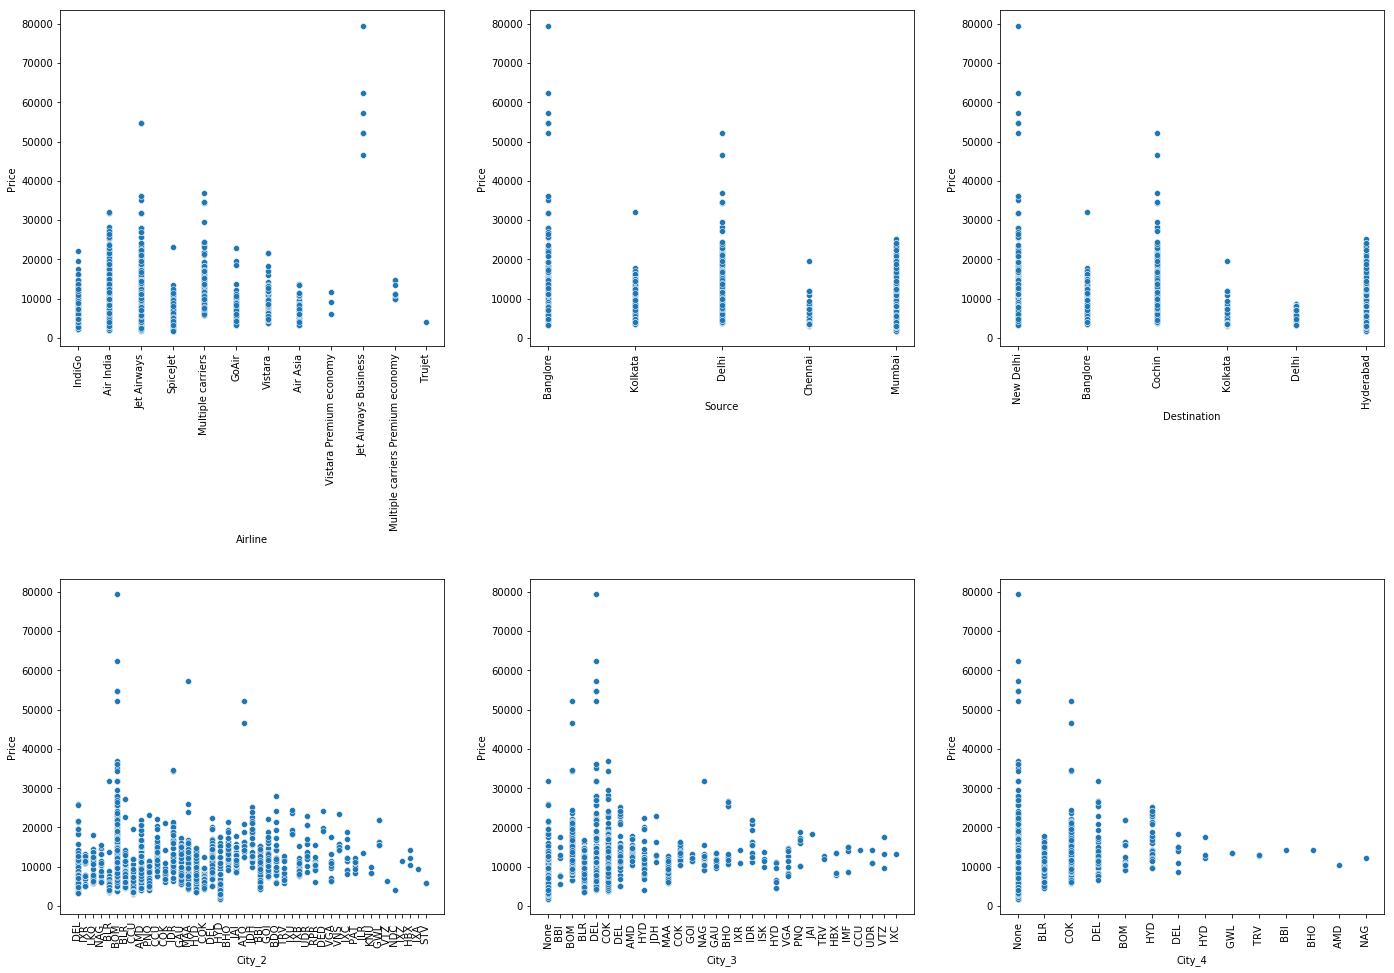

In [46]:
c=1
plt.figure(figsize=(20,45))

for i in cat_df.columns:
    plt.subplot(6,3,c)
    sns.scatterplot(x=cat_df[i],y=cont_df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

### Numerical features Vs price

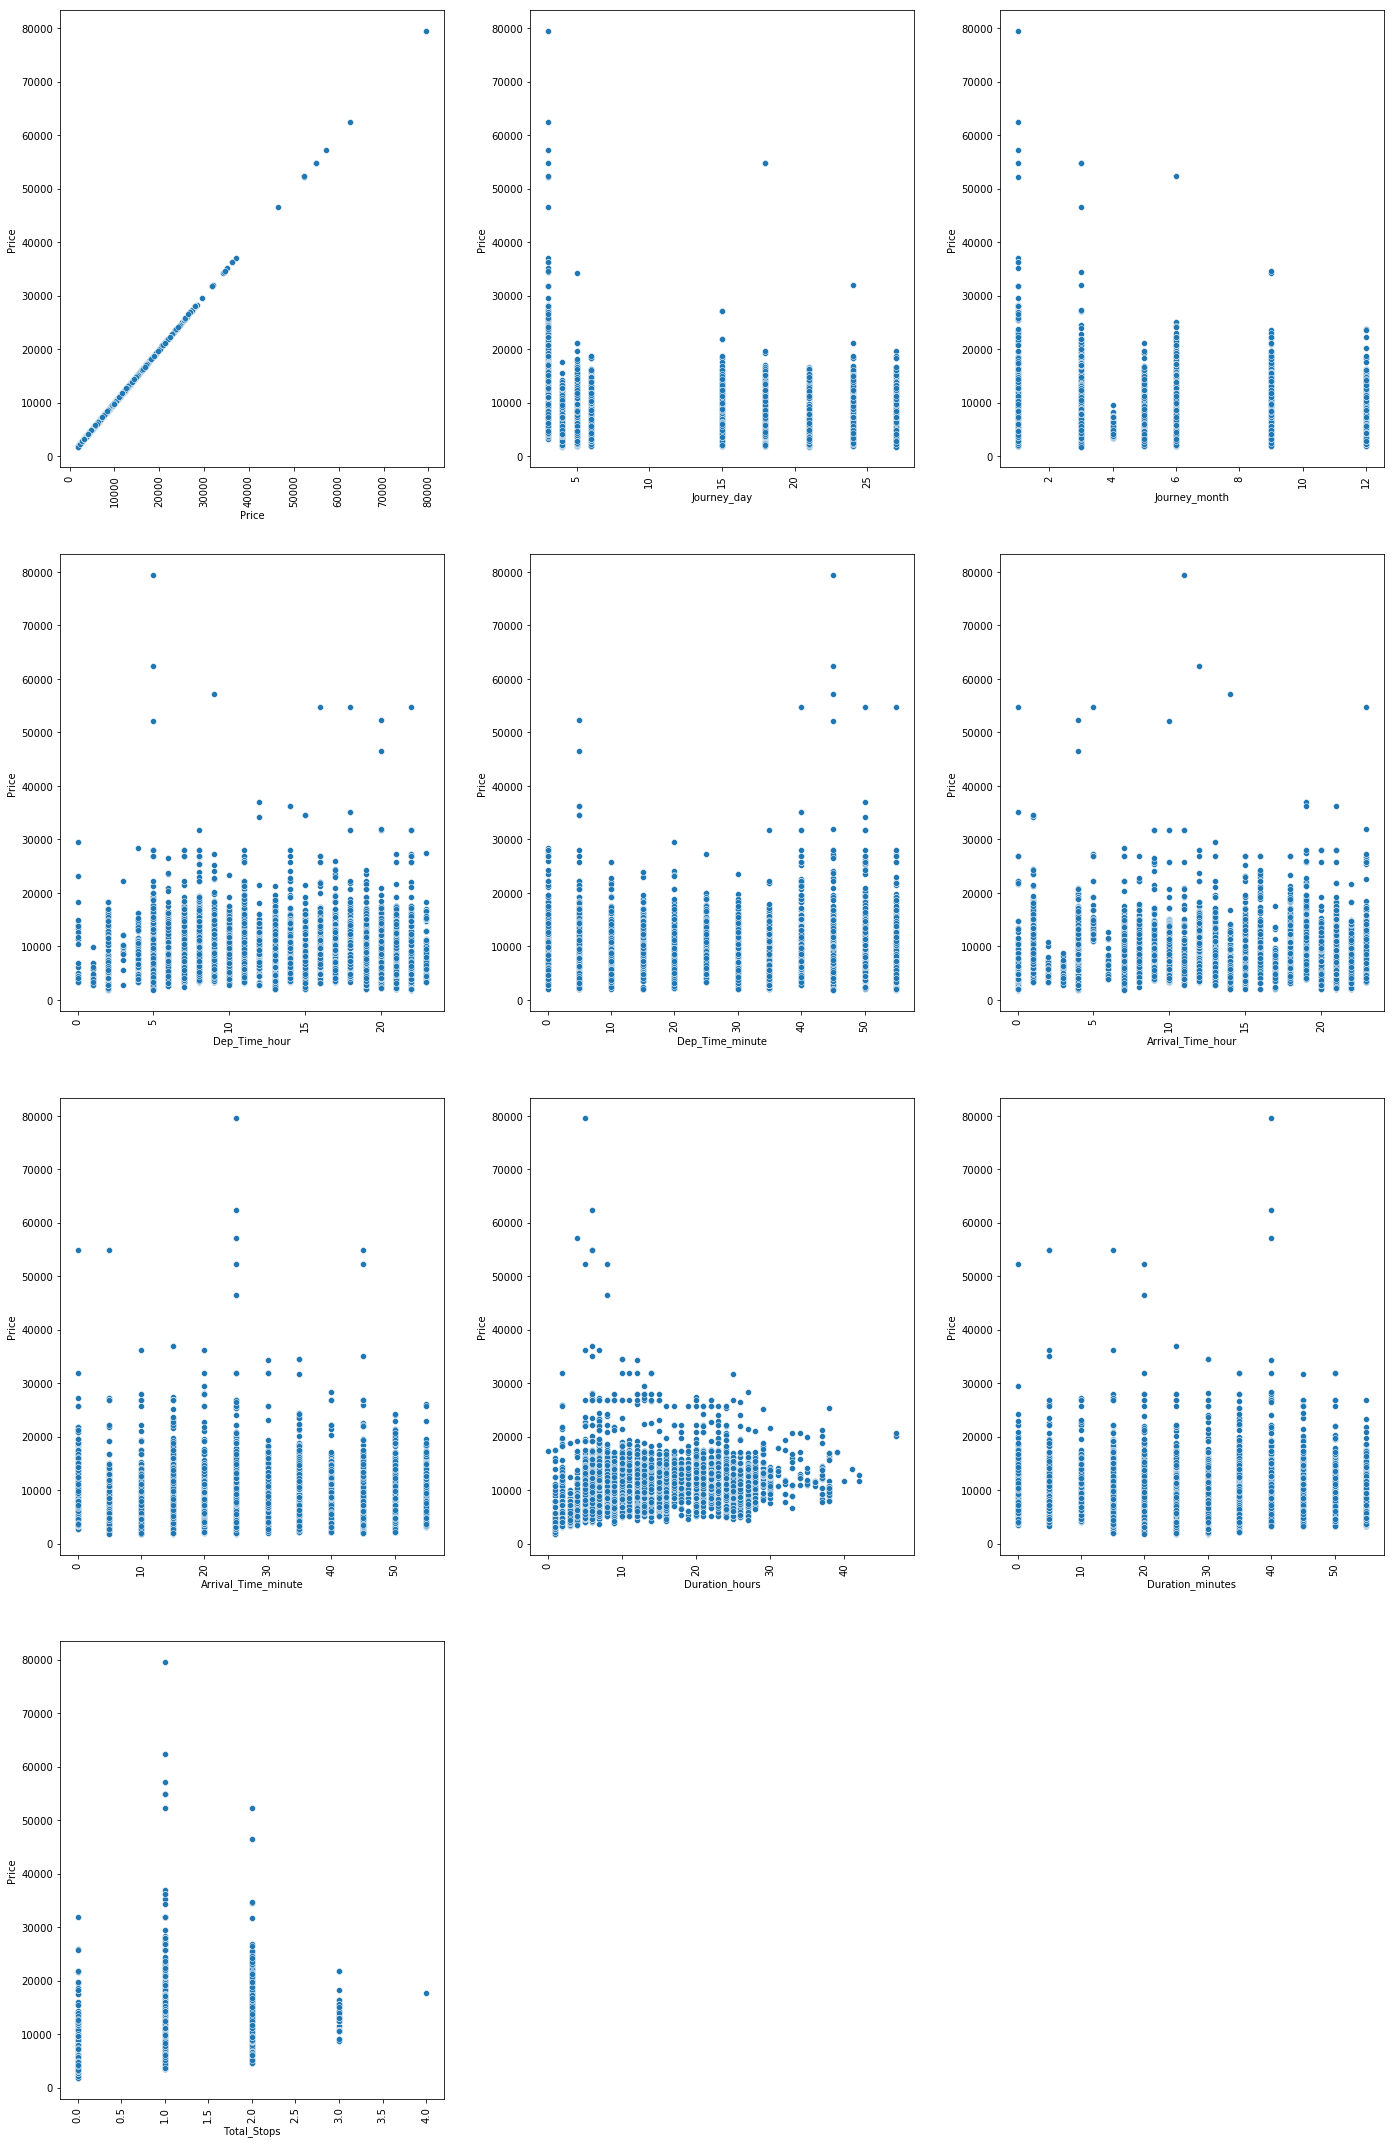

In [47]:
c=1
plt.figure(figsize=(20,45))

for i in cont_df.columns:
    plt.subplot(6,3,c)
    sns.scatterplot(x=cont_df[i],y=cont_df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

In [48]:
cont_df.drop(['Dep_Time_minute','Arrival_Time_minute','Duration_minutes',],axis=1,inplace=True)

### Handling Outliers

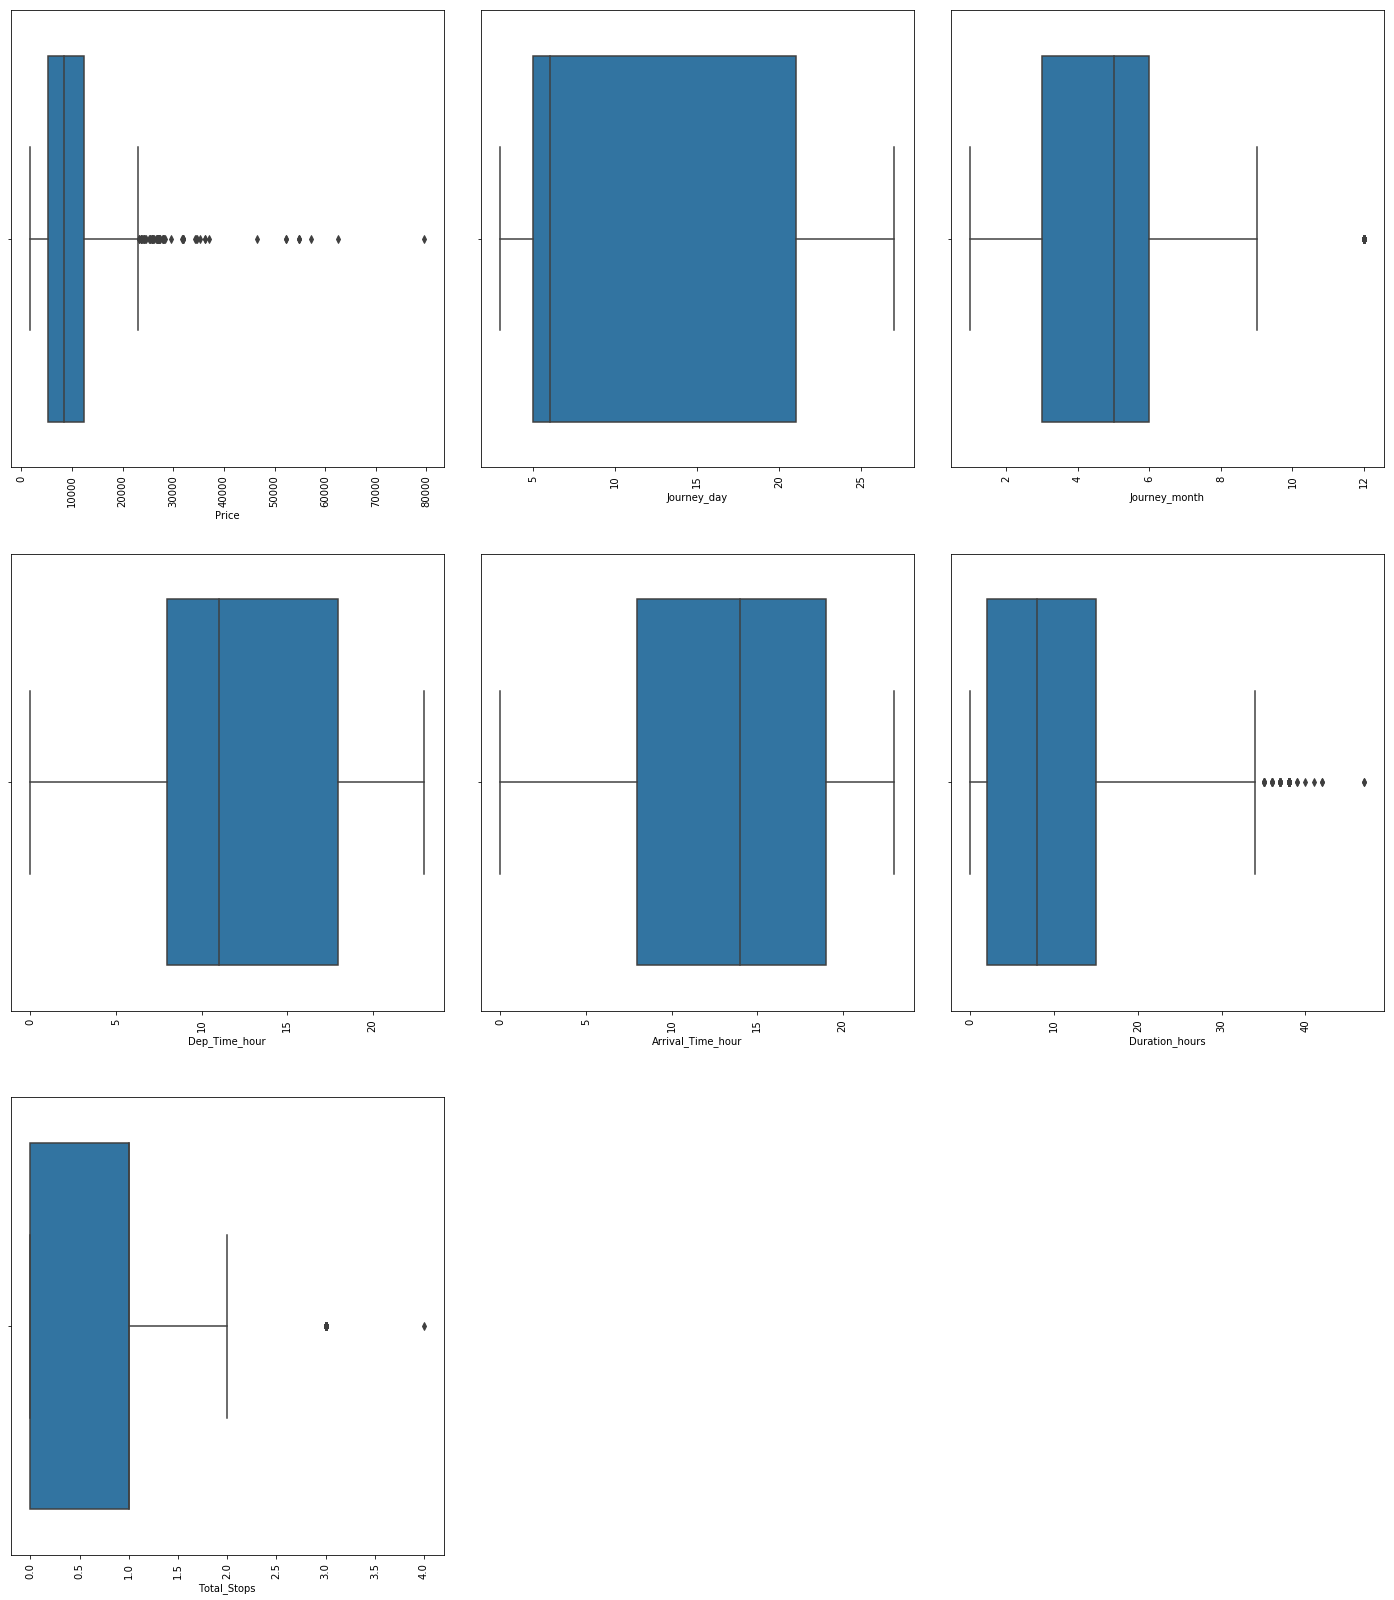

In [49]:
#outlier detection
c=1
plt.figure(figsize=(20,45))

for i in cont_df.columns:
    plt.subplot(6,3,c)
    sns.boxplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

In [50]:
#treating skewness
cont_df.skew()

Price                1.812405
Journey_day          0.367212
Journey_month        0.629556
Dep_Time_hour        0.112924
Arrival_Time_hour   -0.370146
Duration_hours       0.851197
Total_Stops          0.317109
dtype: float64

In [51]:
cont_df.Duration_hours.median()

8.0

In [52]:
cont_df.skew()

Price                1.812405
Journey_day          0.367212
Journey_month        0.629556
Dep_Time_hour        0.112924
Arrival_Time_hour   -0.370146
Duration_hours       0.851197
Total_Stops          0.317109
dtype: float64

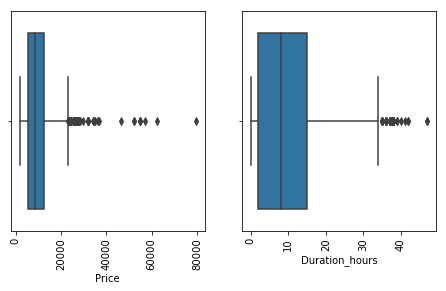

In [53]:
c=1
plt.figure(figsize=(10,25))

for i in ['Price','Duration_hours']:
    plt.subplot(6,3,c)
    sns.boxplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

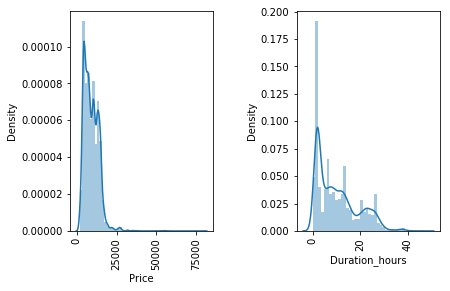

In [54]:
c=1
plt.figure(figsize=(10,25))

for i in ['Price','Duration_hours']:
    plt.subplot(6,3,c)
    sns.distplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

In [55]:
cont_df.Duration_hours=np.log(cont_df.Duration_hours)

In [56]:
for i,v in enumerate(cont_df.Duration_hours):
    if v==float('-inf'):
        cont_df.Duration_hours[i]=0

In [57]:
cont_df.Duration_hours.skew()

-0.2659610157936265

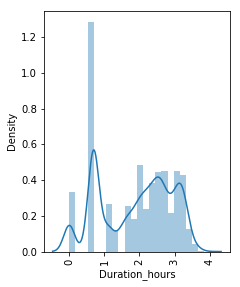

In [58]:
c=1
plt.figure(figsize=(10,25))

for i in ['Duration_hours']:
    plt.subplot(6,3,c)
    sns.distplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

## Encoding Categorical Data

In [59]:
cat_df.columns

Index(['Airline', 'Source', 'Destination', 'City_2', 'City_3', 'City_4'], dtype='object')

In [60]:
#Encoding Nominal data with OneHotEncoder
airline=pd.get_dummies(cat_df['Airline'],drop_first=True)

In [61]:
cat_df.drop(['Airline'],axis=1,inplace=True)

In [62]:
cat_df=pd.concat([airline,cat_df],axis=1)

In [63]:
pd.options.display.max_columns=None

In [64]:
cat_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source,Destination,City_2,City_3,City_4
0,0,0,1,0,0,0,0,0,0,0,0,Banglore,New Delhi,DEL,None,None
1,1,0,0,0,0,0,0,0,0,0,0,Kolkata,Banglore,IXR,BBI,BLR
2,0,0,0,1,0,0,0,0,0,0,0,Delhi,Cochin,LKO,BOM,COK
3,0,0,1,0,0,0,0,0,0,0,0,Kolkata,Banglore,NAG,BLR,None
4,0,0,1,0,0,0,0,0,0,0,0,Banglore,New Delhi,NAG,DEL,None


In [65]:
#Encoding Ordinal data with labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for c in ['City_2', 'City_3', 'City_4','Source','Destination']:
    if cat_df[c].dtypes=='object':
        cat_df[c]=le.fit_transform(cat_df[c])

In [66]:
cat_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source,Destination,City_2,City_3,City_4
0,0,0,1,0,0,0,0,0,0,0,0,0,5,13,29,13
1,1,0,0,0,0,0,0,0,0,0,0,3,0,25,1,3
2,0,0,0,1,0,0,0,0,0,0,0,2,1,32,4,5
3,0,0,1,0,0,0,0,0,0,0,0,3,0,34,3,13
4,0,0,1,0,0,0,0,0,0,0,0,0,5,34,8,13


### Final data

In [67]:
data=pd.concat([cat_df,cont_df],axis=1)

In [68]:
# #40,000 cuz almost 80% of outliers' values lies under 40000
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

In [69]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source,Destination,City_2,City_3,City_4,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Total_Stops
0,0,0,1,0,0,0,0,0,0,0,0,0,5,13,29,13,3897.0,24,3,22,1,0.693147,0
1,1,0,0,0,0,0,0,0,0,0,0,3,0,25,1,3,7662.0,5,1,5,13,1.945910,2
2,0,0,0,1,0,0,0,0,0,0,0,2,1,32,4,5,13882.0,6,9,9,4,2.944439,2
3,0,0,1,0,0,0,0,0,0,0,0,3,0,34,3,13,6218.0,5,12,18,23,1.609438,1
4,0,0,1,0,0,0,0,0,0,0,0,0,5,34,8,13,13302.0,3,1,16,21,1.386294,1


In [70]:
data.shape

(10682, 23)

In [71]:
data.to_excel('Preprocessed_Data.xlsx',engine='openpyxl')

## Splitting Data into Input and Target

In [72]:
x=data.drop('Price',axis=1)
y=np.array(data.Price)

## Splitting Data into Traning Set and Test Set

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [74]:
print("size: \nx_train: {} ,y_train: {} \nx_test: {} ,y_test: {}".format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

size: 
x_train: (8011, 22) ,y_train: (8011,) 
x_test: (2671, 22) ,y_test: (2671,)


## Scaling the data

In [75]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x_train.iloc[:,11:])
y_train=y_train.reshape(len(y_train),1)
y_train_scaled=sc_y.fit_transform(y_train)
x_tscaled=sc_x.transform(x_test.iloc[:,11:])

In [76]:
print("size: \nx_scaled: {} ,y_train_scaled: {} \nx_tscaled: {} ,y_test: {}".format(x_scaled.shape,y_train_scaled.shape,x_tscaled.shape,y_test.shape))

size: 
x_scaled: (8011, 11) ,y_train_scaled: (8011, 1) 
x_tscaled: (2671, 11) ,y_test: (2671,)


In [77]:
x_train_scaled=np.concatenate((x_train.iloc[:,:11],x_scaled),axis=1)
x_test_scaled=np.concatenate((x_test.iloc[:,:11],x_tscaled),axis=1)

In [78]:
x_train_scaled.shape

(8011, 22)

In [79]:
train_data=pd.DataFrame(x_train_scaled,columns=x.columns)
train_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source,Destination,City_2,City_3,City_4,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Total_Stops
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737439,1.065984,0.878358,1.386252,0.410320,1.631399,-0.179329,-0.079849,-0.055915,-1.860581,-1.213140
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.663776,2.422659,0.132476,1.386252,0.410320,-1.099160,-1.518193,0.967069,1.112112,-1.177816,-1.213140
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036831,-0.290692,-1.483601,-0.820589,-2.294253,0.948760,-0.179329,0.094638,0.820105,1.456276,1.739006
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887135,-0.969030,-0.613406,-0.555768,-2.970397,0.266120,-0.179329,0.618096,-0.055915,1.090278,1.739006
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036831,-0.290692,1.997180,-0.820589,-2.294253,1.631399,-0.179329,-0.603307,-1.369947,0.986496,1.739006


## Model Selection

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lr=LinearRegression()
svr=SVR()
knr=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

In [81]:
def predict(reg):
    for r in reg:
        r.fit(x_train_scaled,y_train_scaled)
        print('Training Score for model {} is {}'.format(r,r.score(x_train_scaled,y_train_scaled)))
        y_pred=sc_y.inverse_transform(r.predict(x_test_scaled))
        print('r2_score: {}'.format(r2_score(y_test,y_pred)))
        print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_pred)))
        print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))
        #sns.distplot(y_test-y_pred)
        plt.show()
        print('-------------------------------------------')

In [82]:
predict([lr,svr,knr,dt,abr,rf,gbr])

Training Score for model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is 0.6034561919784757
r2_score: 0.618228084007239
Mean Absolute Error: 1954.4765637803268
Mean Squared Error: 7248165.0762352925
-------------------------------------------
Training Score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is 0.743369006156788
r2_score: 0.7291612162803701
Mean Absolute Error: 1558.0900469598614
Mean Squared Error: 5142034.10783073
-------------------------------------------
Training Score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is 0.8264327531779635
r2_score: 0.7338455265391433
Mean Absolute Error: 1558.065293897417
Mean Squared Error: 5053099.713755148
-----------------------------------------

## Cross - Validation

In [83]:
 from sklearn.model_selection import cross_val_score

### RandomForestRegressor

In [84]:
print(rf)
for i in range(5,11):
    accuracy=cross_val_score(rf,x_train_scaled,y_train_scaled,cv=i)
    print('Accuracy: {}'.format(accuracy.mean()))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Accuracy: 0.7976791251896166
Accuracy: 0.7910554838591465
Accuracy: 0.7944873642183297
Accuracy: 0.7930010694662909
Accuracy: 0.7953266698701527
Accuracy: 0.7934313981416902


### GradientBoostingRegressor

In [85]:
print(gbr)
for i in range(5,11):
    accuracy=cross_val_score(gbr,x_train_scaled,y_train_scaled,cv=i)
    print('Accuracy: {}'.format(accuracy.mean()))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Accuracy: 0.7920796292668213
Accuracy: 0.7921624205011887
Accuracy: 0.7923604469119147
Accuracy: 0.7931863720511255
Accuracy: 0.7920070280222072
Accuracy: 0.7925309811417902


## Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV

### RandomForestRegressor

In [87]:
param_grid={'n_estimators':[50,70,100,120,150,200],'max_depth':[None,2,4,5,10],'min_samples_split':[2, 5, 10]}

In [88]:
gs_rf=GridSearchCV(rf,param_grid,cv=5)
gs_rf.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 70, 100, 120, 150, 200], 'max_depth': [None, 2, 4, 5, 10], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
gs_rf.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [90]:
gs_rf.best_score_

0.8286976927098015

### GradientBoostingRegressor

In [91]:
param_grid={'learning_rate':[0.1,0.05,0.01],'n_estimators':[50,70,100,120,150],'min_samples_split':[2,4,5],
           'max_depth':[3,4,5,7,10]}

In [92]:
gs_gbr=GridSearchCV(gbr,param_grid,cv=5)
gs_gbr.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [50, 70, 100, 120, 150], 'min_samples_split': [2, 4, 5], 'max_depth': [3, 4, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
gs_gbr.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 4,
 'n_estimators': 100}

In [94]:
gs_gbr.best_score_

0.8415961655568258

## Creating and Saving model instance with best parameters

In [95]:
import joblib

In [96]:
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=7,min_samples_split=4,n_estimators=100)

In [97]:
model.fit(x_train_scaled,y_train_scaled)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
joblib.dump(model,'fare_prices_pred.obj')

['fare_prices_pred.obj']

## Testing the model

In [99]:
final_model=joblib.load('fare_prices_pred.obj')

In [100]:
y_pred=sc_y.inverse_transform(final_model.predict(x_test_scaled))

In [101]:
r2_score(y_test,y_pred)

0.8508603058851925

In [102]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,4441.0,5006.013521
1,14151.0,12455.751957
2,14151.0,13163.007877
3,13555.0,11826.166827
4,6442.0,6434.769798
...,...,...
2666,8367.0,9779.518268
2667,9001.0,10520.734928
2668,13941.0,11684.622451
2669,3383.0,4386.676529


## Predicting on Unseen Data

In [103]:
from data_preprocess import DataPreprocess

In [104]:
fair_price_model=joblib.load('fare_prices_pred.obj')

In [105]:
test_data=pd.read_excel('Test_set.xlsx',engine='openpyxl')
data=test_data.copy()

In [106]:
dp=DataPreprocess(data)

In [107]:
prepo_x=dp.preprocess(data)

In [108]:
prepo_x.shape

(2671, 22)

In [109]:
y_pred=sc_y.inverse_transform(final_model.predict(prepo_x))

In [110]:
pd.DataFrame({"Price":y_pred})

,Price
0,12264.639589
1,5485.819767
2,13264.994200
3,9943.987354
4,5085.365078
...,...
2666,8300.648716
2667,5607.072691
2668,13033.933494
2669,14350.846775
